In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [35]:
df = pd.read_csv("../ABIDE/children/asd/KKI_0050792_rois_aal.1D", delim_whitespace=True)
df

,#2001,#2002,#2101,#2102,#2111,#2112,#2201,#2202,#2211,#2212,...,#9081,#9082,#9100,#9110,#9120,#9130,#9140,#9150,#9160,#9170
0,-0.072165,-0.372312,-0.758671,-1.445400,-2.020562,-2.252671,-0.204545,-0.939689,-0.722443,-2.641464,...,-0.084394,-0.522274,3.818954,0.869242,0.127002,-0.102802,-0.005245,-0.255222,1.732474,-0.201773
1,-0.331765,-0.204166,-0.571359,-1.967132,-1.665960,-2.981622,-0.228498,-1.182785,-0.941134,-2.138454,...,-0.285078,0.577917,2.342952,-0.099655,-1.582637,-0.214981,-0.010892,-0.229384,1.178222,1.288979
2,-0.075645,0.473288,-0.115721,-1.588845,-1.435760,-1.832679,0.100939,-1.250967,-0.567814,2.089991,...,-1.029618,0.624615,0.283703,1.594990,-0.978979,0.675633,0.125177,-0.367674,-0.386739,0.883238
3,0.397764,0.743104,-0.088510,-0.878588,-1.703569,0.143730,0.922622,-0.929694,-0.088407,6.530522,...,-1.211847,-0.248991,2.639521,4.313308,1.040199,0.311008,-1.020932,-0.884654,-1.526541,-1.808856
4,0.363736,-0.032227,-0.347067,-0.466863,-0.197414,1.823144,1.366655,-0.417410,0.674190,9.138104,...,0.252635,-0.256589,6.424982,3.556149,0.700226,-1.677208,-2.833441,-1.289563,-1.897168,-2.582002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.017808,2.265241,-1.928156,-0.208271,-3.519598,-1.067049,-1.455144,-0.232169,-3.421005,-5.687074,...,2.104453,-1.256524,-0.999549,2.131274,-3.794568,0.192361,1.535034,-0.251522,3.626544,-3.532667
119,-0.204478,1.812215,-2.996777,-0.460818,-2.377303,-0.006807,-1.421501,0.669756,-3.007283,-5.259322,...,2.111778,0.446042,0.913991,0.002715,-1.514054,0.447500,0.448830,-0.299766,2.755396,-6.214224
120,-0.265721,0.276580,-1.851146,-0.212614,1.830050,0.993370,-0.210469,1.487072,1.264591,1.977998,...,0.919762,1.587020,1.168982,-2.608383,0.366686,-0.956403,-1.063849,-0.176303,0.189982,-3.264182
121,0.058025,-0.654120,0.232474,0.417756,4.431634,0.795874,0.693153,1.632747,4.261867,8.096057,...,-0.296693,0.785887,-2.549470,-3.177868,0.660590,-1.279888,-1.096291,-0.536339,-2.406761,1.890099


In [36]:
corr = df.corr(method="pearson", numeric_only=True)

In [37]:
correlation_matrix = corr.to_numpy()

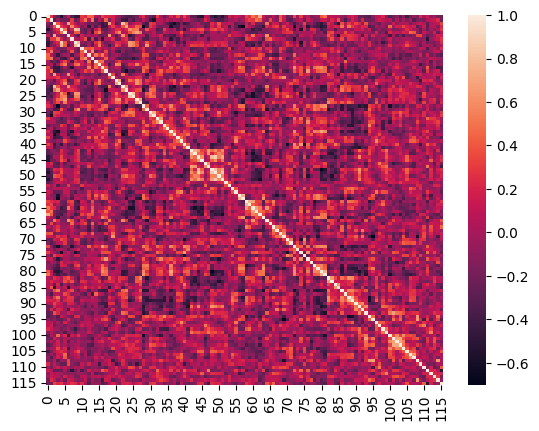

In [38]:
sns.heatmap(correlation_matrix)
plt.show()

In [39]:
flattened = correlation_matrix[np.triu_indices_from(correlation_matrix, k=1)]
threshold = np.percentile(flattened, 80)
threshold

0.19014624872443003

In [47]:
threshold_2 = np.percentile(correlation_matrix, 80)
threshold_2

0.19646828213775905

In [67]:
brain_network = np.zeros(shape=correlation_matrix.shape)
brain_network[np.where(correlation_matrix > 0.1895)] = 1

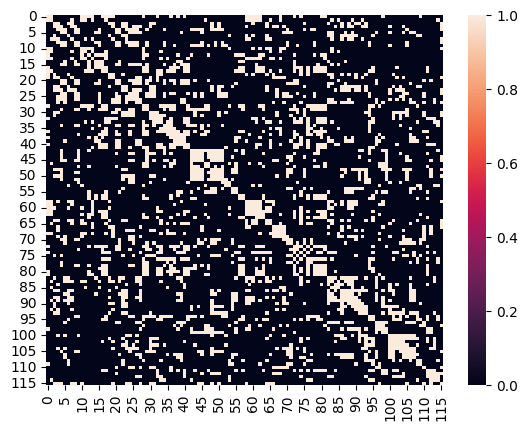

In [59]:
sns.heatmap(brain_network)
plt.show()

In [68]:
np.savetxt("../tmp.txt", brain_network, fmt="%i")

In [69]:
theirs = np.loadtxt("../datasets/children/asd/KKI_0050792.txt")
ours = np.loadtxt("../tmp.txt")

diff = theirs - ours

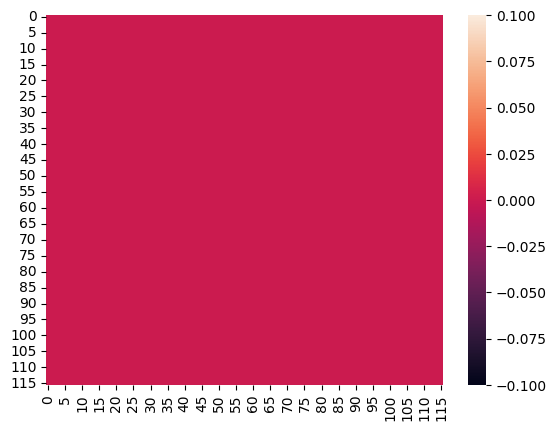

In [70]:
ax = sns.heatmap(diff)
plt.show()